# Hypothesis Testing with Insurance Data (Core)

For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

---

## Q1. Do smokers have higher insurance charges than non-smokers?

### 1. State the Alternative Hypothesis & Null Hypothesis


- Null Hypothesis: There is no difference between smokers and non smokers having higher insurance charges.
- Alternative Hypothesis: There is a significant difference between higher insurance charges for smokers than non smokers.

### 2. Select the correct test according to the data type and number of samples

- 'Numeric' data. 
- We also have 2 Sample/groups.
- Lastly, we will run a 2 sample T-Test

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy

In [2]:
df = pd.read_csv('Data/insurance_insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df['charges'].round()


0       16885.0
1        1726.0
2        4449.0
3       21984.0
4        3867.0
         ...   
1333    10601.0
1334     2206.0
1335     1630.0
1336     2008.0
1337    29141.0
Name: charges, Length: 1338, dtype: float64

In [4]:
df['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
df['non_smoker'] = df['smoker'].str.contains('no')
df['non_smoker'].value_counts()

True     1064
False     274
Name: non_smoker, dtype: int64

In [6]:
needed_cols = ['non_smoker','charges']

df[needed_cols]

,non_smoker,charges
0,False,16884.92400
1,True,1725.55230
2,True,4449.46200
3,True,21984.47061
4,True,3866.85520
...,...,...
1333,True,10600.54830
1334,True,2205.98080
1335,True,1629.83350
1336,True,2007.94500


In [7]:
smoker = df.loc[df['non_smoker']== False, needed_cols]
smoker

,non_smoker,charges
0,False,16884.92400
11,False,27808.72510
14,False,39611.75770
19,False,36837.46700
23,False,37701.87680
...,...,...
1313,False,36397.57600
1314,False,18765.87545
1321,False,28101.33305
1323,False,43896.37630


In [8]:
non_smokers = df.loc[df['non_smoker']== True, needed_cols]
non_smokers

,non_smoker,charges
1,True,1725.55230
2,True,4449.46200
3,True,21984.47061
4,True,3866.85520
5,True,3756.62160
...,...,...
1332,True,11411.68500
1333,True,10600.54830
1334,True,2205.98080
1335,True,1629.83350


In [9]:
plot_df = pd.concat([smoker, non_smokers])

plot_df

,non_smoker,charges
0,False,16884.9240
11,False,27808.7251
14,False,39611.7577
19,False,36837.4670
23,False,37701.8768
...,...,...
1332,True,11411.6850
1333,True,10600.5483
1334,True,2205.9808
1335,True,1629.8335


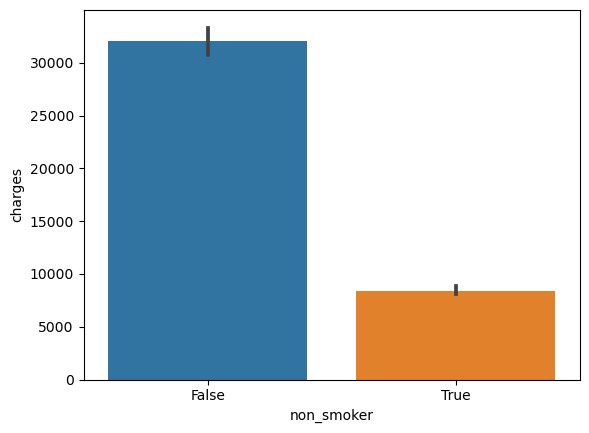

In [10]:
ax= sns.barplot(data = plot_df, x= 'non_smoker', y = 'charges')


### 3. Test the assumptions of your selected test.

In [11]:
smokers_group = smoker['charges']
non_smokers_group = non_smokers['charges']
smokers_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [12]:
non_outliers = np.abs(stats.zscore(non_smokers_group)) > 3
non_outliers.sum()


24

In [13]:
non_smokers_group = non_smokers_group.loc[~non_outliers]
non_smokers_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [14]:
smokers_outliers = np.abs(stats.zscore(smokers_group)) > 3
smokers_outliers.sum()

0

In [15]:
smokers_group = smokers_group.loc[~smokers_outliers]
smokers_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

### 4.Execute the selected test, or the alternative test (if you do not meet the assumptions)

#### We will start by testing each group for Normality. 

In [16]:
non_smoker_results = stats.normaltest(non_smokers_group)
non_smoker_results

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [17]:
len(non_smokers_group)

1040

In [18]:
smokers_result = stats.normaltest(smokers_group)
smokers_result

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [19]:
len(smokers_group)

274

#### We will also conduct testing for Equal Variance with Levene's Test.

In [20]:
smoke_result = stats.levene(smokers_group, non_smokers_group)
smoke_result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [21]:
if smoke_result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


#### Conducting Final Hypothesis Independent T-Test

In [22]:
smoker_ttest = stats.ttest_ind(smokers_group,non_smokers_group, equal_var=False)
print(smoker_ttest)
smoker_ttest.pvalue < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

In [23]:
print(f"p-value={smoker_ttest.pvalue:.10f}")
print(f"Significant: {smoker_ttest.pvalue <.05}")

p-value=0.0000000000
Significant: True


### 5. Interpret your p-value and reject or fail to reject your null hypothesis 


Based on the p-values above we will proceed with rejecting the null hypothesis and agree with the alternative hypothesis.

From the figure above, we can interrupt that smokers do have higher charges, let us continue with testing samples. 


---

##  Q2. Are men more likely to smoke than women?

### 1. State your Null Hypothesis and Alternative Hypothesis.

- Null Hypothesis: There is no difference between men being more likely to smoke than women.
- Alternative Hypothesis: There is a significant difference between men being more likely to smoke than women.

### 2. Select the correct test according to the data type and number of samples.

For Q2, we are looking at 'Categorical' data.



- We have 2 samples/groups.
- We will be conducting 'Chi=Square'

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   non_smoker  1338 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 74.6+ KB


In [25]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [26]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

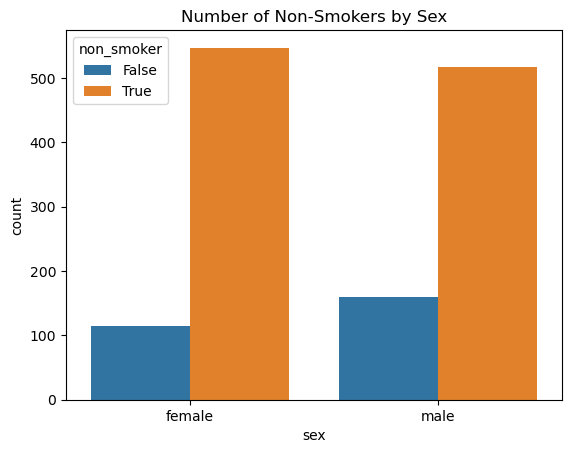

In [27]:
ax = sns.countplot(data = df, x= 'sex',hue='non_smoker')
ax.set_title("Number of Non-Smokers by Sex");

In [28]:
df['non_smokers'] = df['smoker'].str.contains('no')
df['non_smokers']

0       False
1        True
2        True
3        True
4        True
        ...  
1333     True
1334     True
1335     True
1336     True
1337    False
Name: non_smokers, Length: 1338, dtype: bool

In [29]:
columns_needed = ['non_smoker','sex']

df[columns_needed]

,non_smoker,sex
0,False,female
1,True,male
2,True,male
3,True,male
4,True,male
...,...,...
1333,True,male
1334,True,female
1335,True,female
1336,True,female


In [30]:
df['has_female'] = df['sex'].str.contains('female')
df['has_female'].value_counts()

False    676
True     662
Name: has_female, dtype: int64

In [31]:
cols_needed = ['has_female','non_smoker']

df[cols_needed]

,has_female,non_smoker
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
1333,False,True
1334,True,True
1335,True,True
1336,True,True


In [32]:
male_df = df.loc[df['has_female']==False,cols_needed]
male_df

,has_female,non_smoker
1,False,True
2,False,True
3,False,True
4,False,True
8,False,True
...,...,...
1324,False,True
1325,False,True
1327,False,True
1329,False,True


In [33]:
female_df = df.loc[df['has_female']==True,cols_needed]
female_df

,has_female,non_smoker
0,True,False
5,True,True
6,True,True
7,True,True
9,True,True
...,...,...
1332,True,True
1334,True,True
1335,True,True
1336,True,True


In [34]:
df_combined = pd.concat([female_df, male_df])
df_combined

,has_female,non_smoker
0,True,False
5,True,True
6,True,True
7,True,True
9,True,True
...,...,...
1324,False,True
1325,False,True
1327,False,True
1329,False,True


<AxesSubplot: xlabel='non_smoker', ylabel='has_female'>

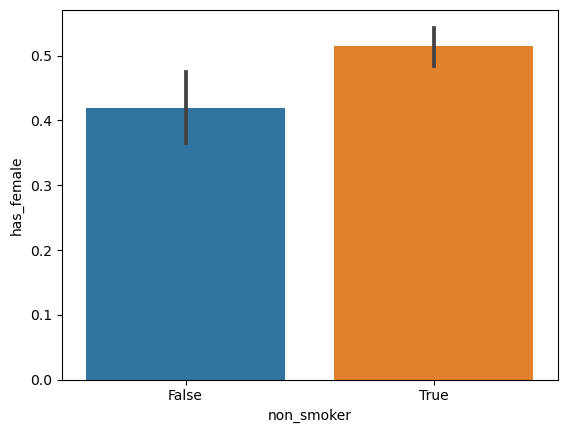

In [35]:
sns.barplot(data = df_combined, y='has_female', x='non_smoker')

### 3. Test the assumptions of your selected test.

We will also conduct a Chi-Squared test, since we are looking at two categorical variables.

In [36]:
table = pd.crosstab(df['sex'], df['non_smoker'])
table

non_smoker,False,True
sex,,
female,115,547
male,159,517


In [37]:
results = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = results

In [38]:
print(p)
p<.05

0.006548143503580696


True

### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [39]:
m_group = male_df['non_smoker']
f_group = female_df['non_smoker']
m_group

1       True
2       True
3       True
4       True
8       True
        ... 
1324    True
1325    True
1327    True
1329    True
1333    True
Name: non_smoker, Length: 676, dtype: bool

In [40]:
f_outliers = np.abs(stats.zscore(f_group)) > 3
f_outliers.sum()

0

In [41]:
female_group = f_group.loc[~f_outliers]
female_group

0       False
5        True
6        True
7        True
9        True
        ...  
1332     True
1334     True
1335     True
1336     True
1337    False
Name: non_smoker, Length: 662, dtype: bool

In [42]:
m_outliers = np.abs(stats.zscore(m_group)) > 3
m_outliers.sum()

0

In [43]:
m_group = m_group.loc[~ m_outliers]
m_group

1       True
2       True
3       True
4       True
8       True
        ... 
1324    True
1325    True
1327    True
1329    True
1333    True
Name: non_smoker, Length: 676, dtype: bool

Testing for Normality 

In [44]:
n_result = stats.normaltest(female_group)
print(n_result)
n_result.pvalue < .05

NormaltestResult(statistic=183.33655045439608, pvalue=1.5451615879702295e-40)


True

In [45]:
len(female_group)

662

In [46]:
m_result = stats.normaltest(m_group)
m_result

NormaltestResult(statistic=122.15639630213954, pvalue=2.9790348129115508e-27)

In [47]:
len(m_group)

676

Testing for Equal Variances

In [48]:
result = stats.levene (m_group, female_group)
print(result)

LeveneResult(statistic=7.799582538314033, pvalue=0.005300369127378653)


In [49]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


### 5. Interpret your p-value and reject or fail to reject your null hypothesis 


Based on the results of both assumption tests, we will reject the null hypothesis. 

### 6. Show a supporting visualization that helps display the result


##  Q3. Do different regions have different charges, on average?



### 1. State your Null Hypothesis and Alternative Hypothesis.

- Null Hypothesis: There is no difference between regions having different charges. 
- Alternative Hypothesis: There is a significant difference between regions 

### 2. Select the correct test according to the data type and number of samples.

- Our Data type is numerical. 
- 2 samples

We will conduct 2 Sample T-Test

### 3. Test the assumptions of your selected test.

### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   non_smoker   1338 non-null   bool   
 8   non_smokers  1338 non-null   bool   
 9   has_female   1338 non-null   bool   
dtypes: bool(3), float64(2), int64(2), object(3)
memory usage: 77.2+ KB


In [51]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [52]:
df['charges'].head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### 5. Interpret your p-value and reject or fail to reject your null hypothesis 

### 6. Show a supporting visualization that helps display the result